# Various MLP Models on MNIST data

## Defining Preliminaries

In [1]:
import seaborn as sns
import pandas as pd
from keras.initializers import RandomNormal
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib notebook
  
def loss_plotter(ty, vy, n_epoch):
    x = list(range(1, n_epoch+1))
    test_l = np.array(ty)
    val_l = np.array(vy)
    
    td = {'epoch': x, 't_loss': test_l}
    vd = {'epoch': x, 'v_loss': val_l}
    
    tdf = pd.DataFrame(td)
    vdf = pd.DataFrame(vd)
    
    ax = sns.set(style='darkgrid')
    ax = sns.lineplot(x='epoch', y='t_loss', data=tdf, label='Training Loss')
    ax = sns.lineplot(x='epoch', y='v_loss', data=vdf, label='Validation loss')
    ax.set(xlabel='Number of epochs', ylabel='Loss')
    plt.legend()
    plt.show()

Using TensorFlow backend.
/home/ananda/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ananda/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ananda/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ananda/anaconda3/lib/python3.6/site-packages/tenso

## Getting the dataset

In [2]:
#Fetching and loading data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Data pre-processing

In [3]:
#Reshaping data to 1-D vectors
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [4]:
#Normalization step
X_train = X_train/255
X_test = X_test/255

#print(X_train[0])

In [5]:
#one-hot-vector encoding for class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print("Class label of first image:", Y_train[0])

Class label of first image: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Model 1: With a two hidden layers of 392 & 196 units each

In [6]:
input_dim = X_train.shape[1]
output_dim = 10

batch_size = 128
n_epoch = 20

#Defining the model architecture
model1 = Sequential([
    Dense(392, input_shape=(784,)),
    Activation('relu')])

model1.add(Dense(196, activation='relu'))
model1.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))


W0730 00:27:54.194854 140345289619264 deprecation_wrapper.py:119] From /home/ananda/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 00:27:54.224792 140345289619264 deprecation_wrapper.py:119] From /home/ananda/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 00:27:54.227717 140345289619264 deprecation_wrapper.py:119] From /home/ananda/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:
#Compiling the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0730 00:27:59.099625 140345289619264 deprecation_wrapper.py:119] From /home/ananda/anaconda3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0730 00:27:59.161942 140345289619264 deprecation_wrapper.py:119] From /home/ananda/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
#Training the model
history = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

W0730 00:28:02.618068 140345289619264 deprecation.py:323] From /home/ananda/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0730 00:28:02.679594 140345289619264 deprecation_wrapper.py:119] From /home/ananda/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.2484 - acc: 0.9277 - val_loss: 0.1146 - val_acc: 0.9650
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0906 - acc: 0.9728 - val_loss: 0.0965 - val_acc: 0.9694
Epoch 3/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0563 - acc: 0.9826 - val_loss: 0.0772 - val_acc: 0.9765
Epoch 4/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0393 - acc: 0.9877 - val_loss: 0.0745 - val_acc: 0.9763
Epoch 5/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0313 - acc: 0.9901 - val_loss: 0.0727 - val_acc: 0.9773
Epoch 6/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0227 - acc: 0.9925 - val_loss: 0.0685 - val_acc: 0.9796
Epoch 7/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0181 - acc: 0.9942 - val_loss: 0.0911 - val_acc

Test loss:  0.1017106584501732
Test accuracy:  0.9808


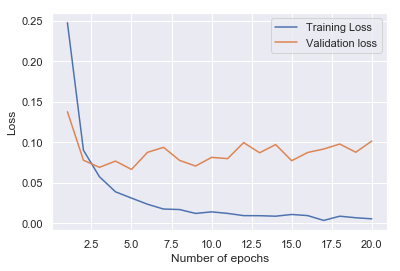

In [9]:
#Evaluating the model

score = model1.evaluate(X_test, Y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

ty = history.history['loss']
vy = history.history['val_loss']

loss_plotter(ty, vy, n_epoch)

**_Inference_**: From the above plot we can conclude that Model 1 overfits to training data as training loss falls much lower than test/validation loss.

## Model 2: With 3 hidden layers of 512, 128 and 32 each using dropouts at p=0.5

In [10]:
from keras.layers import Dropout

input_dim = X_train.shape[1]
output_dim = 10

batch_size = 128
n_epoch = 20

#Defining the model architecture

model2 = Sequential([
    Dense(512, input_shape=(784,)),
    Activation('relu')])

model2.add(Dropout(rate=0.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))


W0729 19:56:42.207182 140068070930240 deprecation.py:506] From /home/ananda/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
#Compiling the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#Training the model
history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.8560 - acc: 0.7241 - val_loss: 0.2379 - val_acc: 0.9393
Epoch 2/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.3825 - acc: 0.8984 - val_loss: 0.1549 - val_acc: 0.9583
Epoch 3/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.2949 - acc: 0.9229 - val_loss: 0.1325 - val_acc: 0.9647
Epoch 4/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.2521 - acc: 0.9340 - val_loss: 0.1169 - val_acc: 0.9711
Epoch 5/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.2217 - acc: 0.9422 - val_loss: 0.1081 - val_acc: 0.9727
Epoch 6/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.1999 - acc: 0.9477 - val_loss: 0.1052 - val_acc: 0.9736
Epoch 7/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.1888 - acc: 0.9514 - val_loss: 0.0974 - 

Test loss:  0.08989270338734014
Test accuracy:  0.981


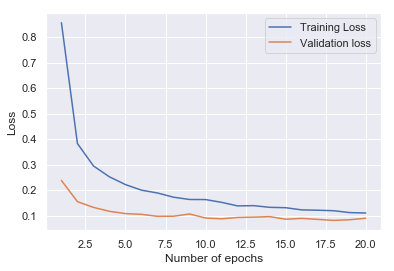

In [13]:
#Evaluating the model
score2 = model2.evaluate(X_test, Y_test, verbose=0)
print("Test loss: ", score2[0])
print("Test accuracy: ", score2[1])

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('epochs')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1, n_epoch+1))

ty = history.history['loss']
vy = history.history['val_loss']

loss_plotter(ty, vy, n_epoch)

**_Inference_**: Model 2 does not overfit to training data due to the use of dropout layers.

## Model 3: With 5 hidden layers of 512, 256, 128, 64, 32 with 2 BatchNorm layers in between

In [14]:
from keras.layers.normalization import BatchNormalization
input_dim = X_train.shape[1]
output_dim = 10

batch_size = 128
n_epoch = 20

#Defining the model architecture

model3 = Sequential([
    Dense(512, input_shape=(784,)),
    Activation('relu')])

model3.add(Dense(256, activation='relu'))
model3.add(BatchNormalization())

model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(BatchNormalization())

model3.add(Dense(32, activation='relu'))
model3.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))


In [15]:
#Compiling the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
#Training the model
history = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.2587 - acc: 0.9266 - val_loss: 0.1376 - val_acc: 0.9580
Epoch 2/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0961 - acc: 0.9712 - val_loss: 0.0940 - val_acc: 0.9714
Epoch 3/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0680 - acc: 0.9787 - val_loss: 0.0786 - val_acc: 0.9765
Epoch 4/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0510 - acc: 0.9839 - val_loss: 0.0910 - val_acc: 0.9728
Epoch 5/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0423 - acc: 0.9860 - val_loss: 0.0820 - val_acc: 0.9769
Epoch 6/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0346 - acc: 0.9892 - val_loss: 0.0752 - val_acc: 0.9767
Epoch 7/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0314 - acc: 0.9897 - val_loss: 0.0921 -

Test loss:  0.08914131843880459
Test accuracy:  0.9785


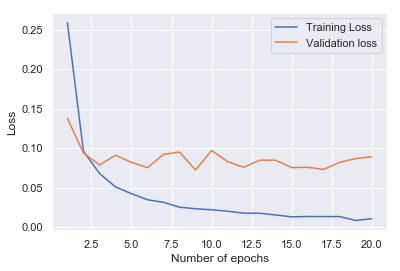

In [17]:
#Evaluating the model
score3 = model3.evaluate(X_test, Y_test, verbose=0)
print("Test loss: ", score3[0])
print("Test accuracy: ", score3[1])

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('epochs')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1, n_epoch+1))

ty = history.history['loss']
vy = history.history['val_loss']

loss_plotter(ty, vy, n_epoch)

**_Inference:_** Model 3 hugely overfits to training data, possibly because of the high number of hidden layers.

**In conclusion, out of the above 3 models, it can be observed that Model 2 performs the best for classifying unseen hand-written digits.**